### Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
data = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

### First look at its main features (head, shape, info).

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

In [7]:
def headers_rename(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    
    return data

data = headers_rename(data)
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Change the type of effective_to_date column to DateTime format.

In [8]:
import time
from datetime import date
from datetime import datetime
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], format='%m/%d/%y')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Check NaN values per column.

In [9]:
data.isnull().sum()/len(data)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

### Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [10]:
def num_cat_split(data):
    num_cols = data.select_dtypes(include = np.number).columns
    cat_cols = data.select_dtypes(include = "object").columns
    
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    
    return num_data, cat_data

num_data, cat_data = num_cat_split(data)

### Drop any ID column.

In [11]:
cat_data = cat_data.drop(["customer"], axis=1)
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


### Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

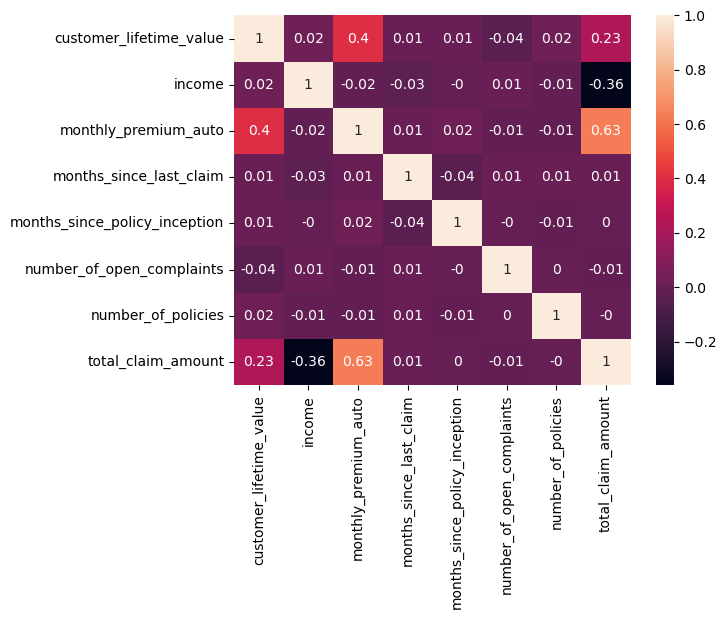

In [13]:
correlations_matrix = round(num_data.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

### Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [14]:
num_data.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [15]:
def continuous_descrete_split(num_data, nunique_set = 36):
    cont_cols = []
    disc_cols = []
    
    for col in num_data:
        if num_data[col].nunique() >= nunique_set:
            cont_cols.append(col)
        else:
            disc_cols.append(col)
            
    continuous_data = num_data[cont_cols]
    discrete_data = num_data[disc_cols]

    return continuous_data, discrete_data

continuous_data, discrete_data = continuous_descrete_split(num_data)

In [16]:
continuous_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [17]:
discrete_data.head()

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


### Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

C:\Users\Kate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


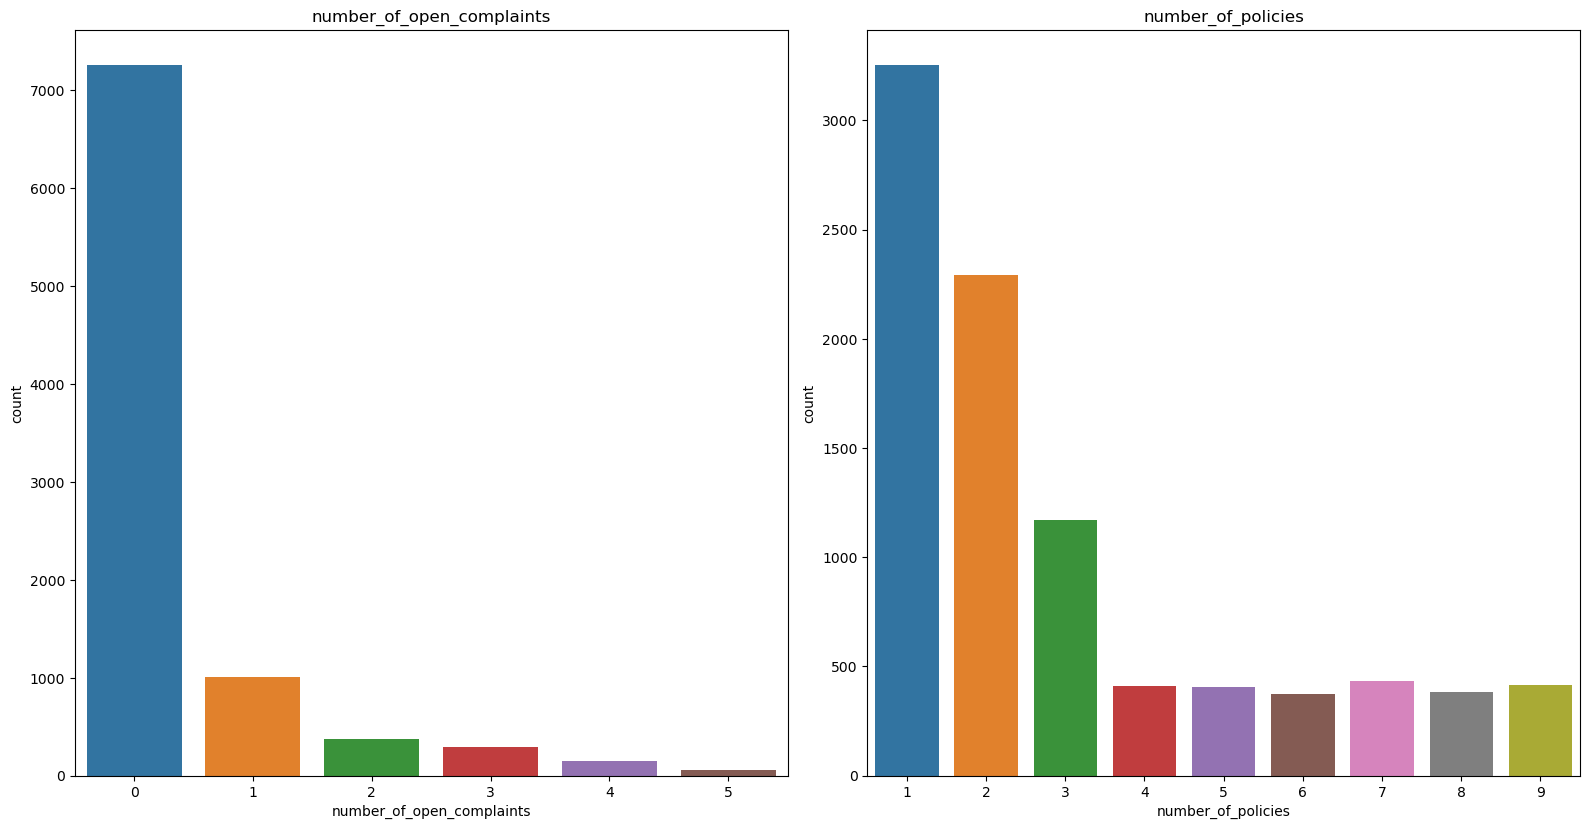

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_discrete_data(discrete_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(discrete_data.columns):
        plt.subplot(len(discrete_data.columns)//2 + 1, 2, i+1)
        sns.countplot(discrete_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_discrete_data(discrete_data)

Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

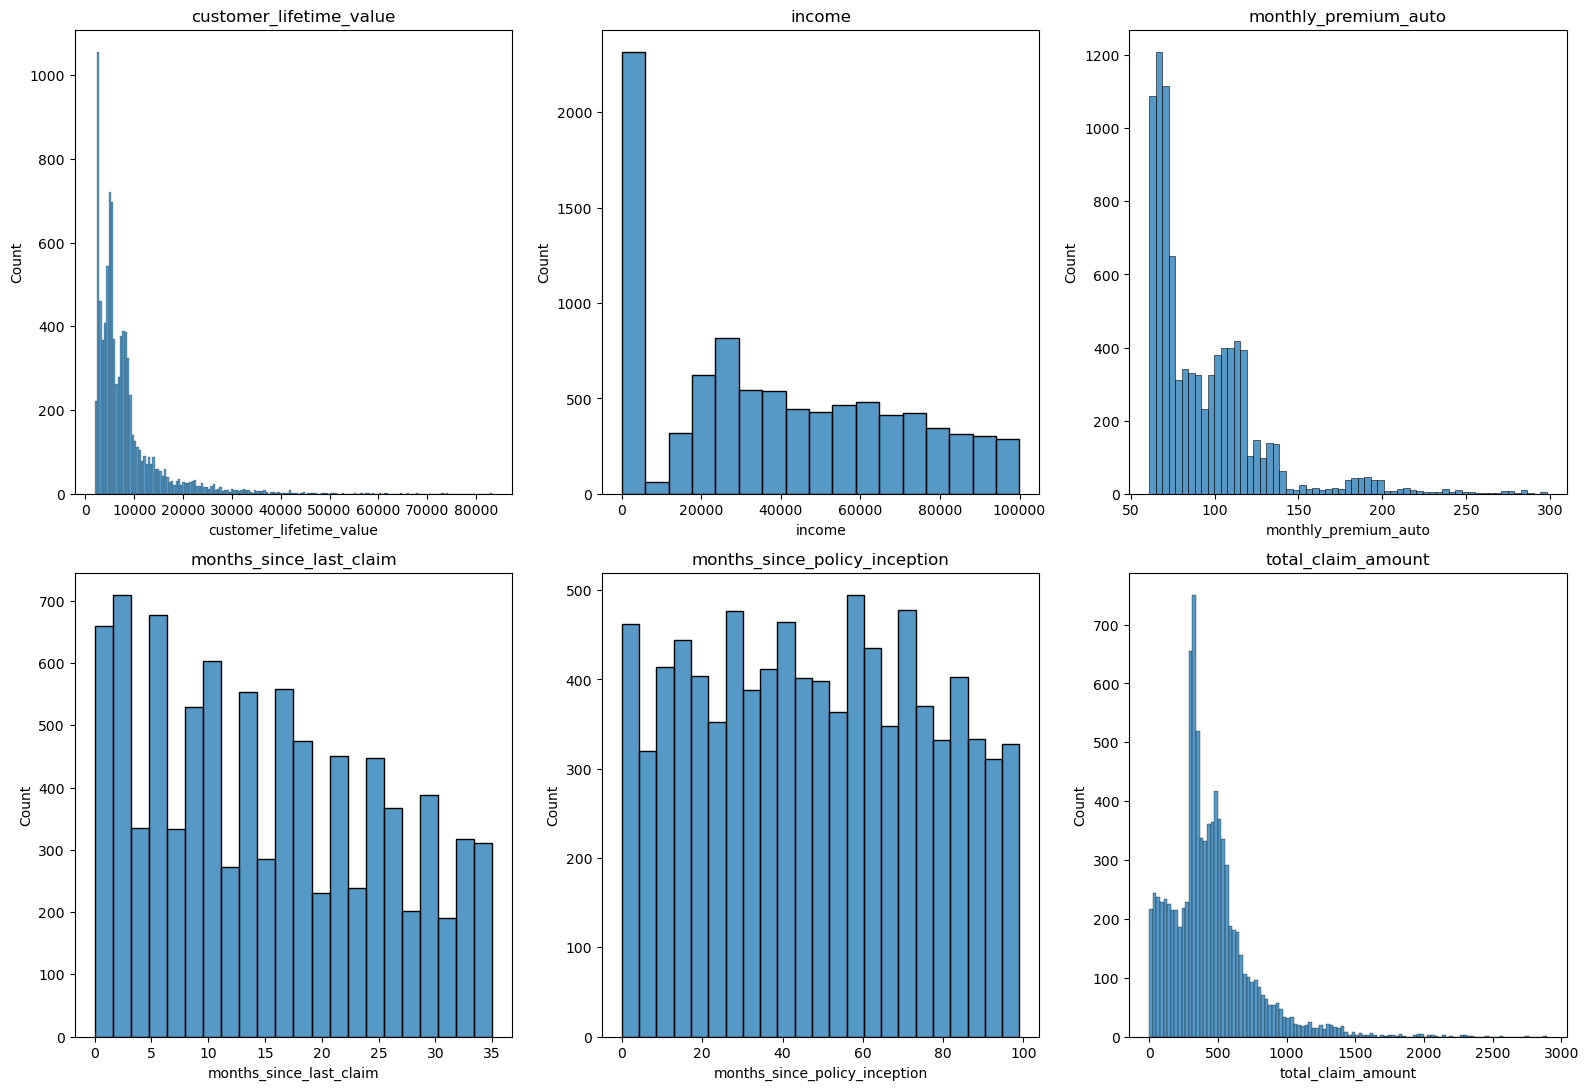

In [19]:
def plot_continuous_data(continuous_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_data.columns):
        plt.subplot(len(continuous_data.columns)//3 + 1, 3, i+1)
        sns.histplot(continuous_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

plot_continuous_data(continuous_data)

### According to the previous histogram plots, do you think that you will have to apply any transformation?

Yes, the transformations will be needed because all the columns have a very different range of values and the distributions are very skewed.I would use both a transformer and a scaler.

### Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

C:\Users\Kate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kate\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kate\anaconda3\lib\site-p

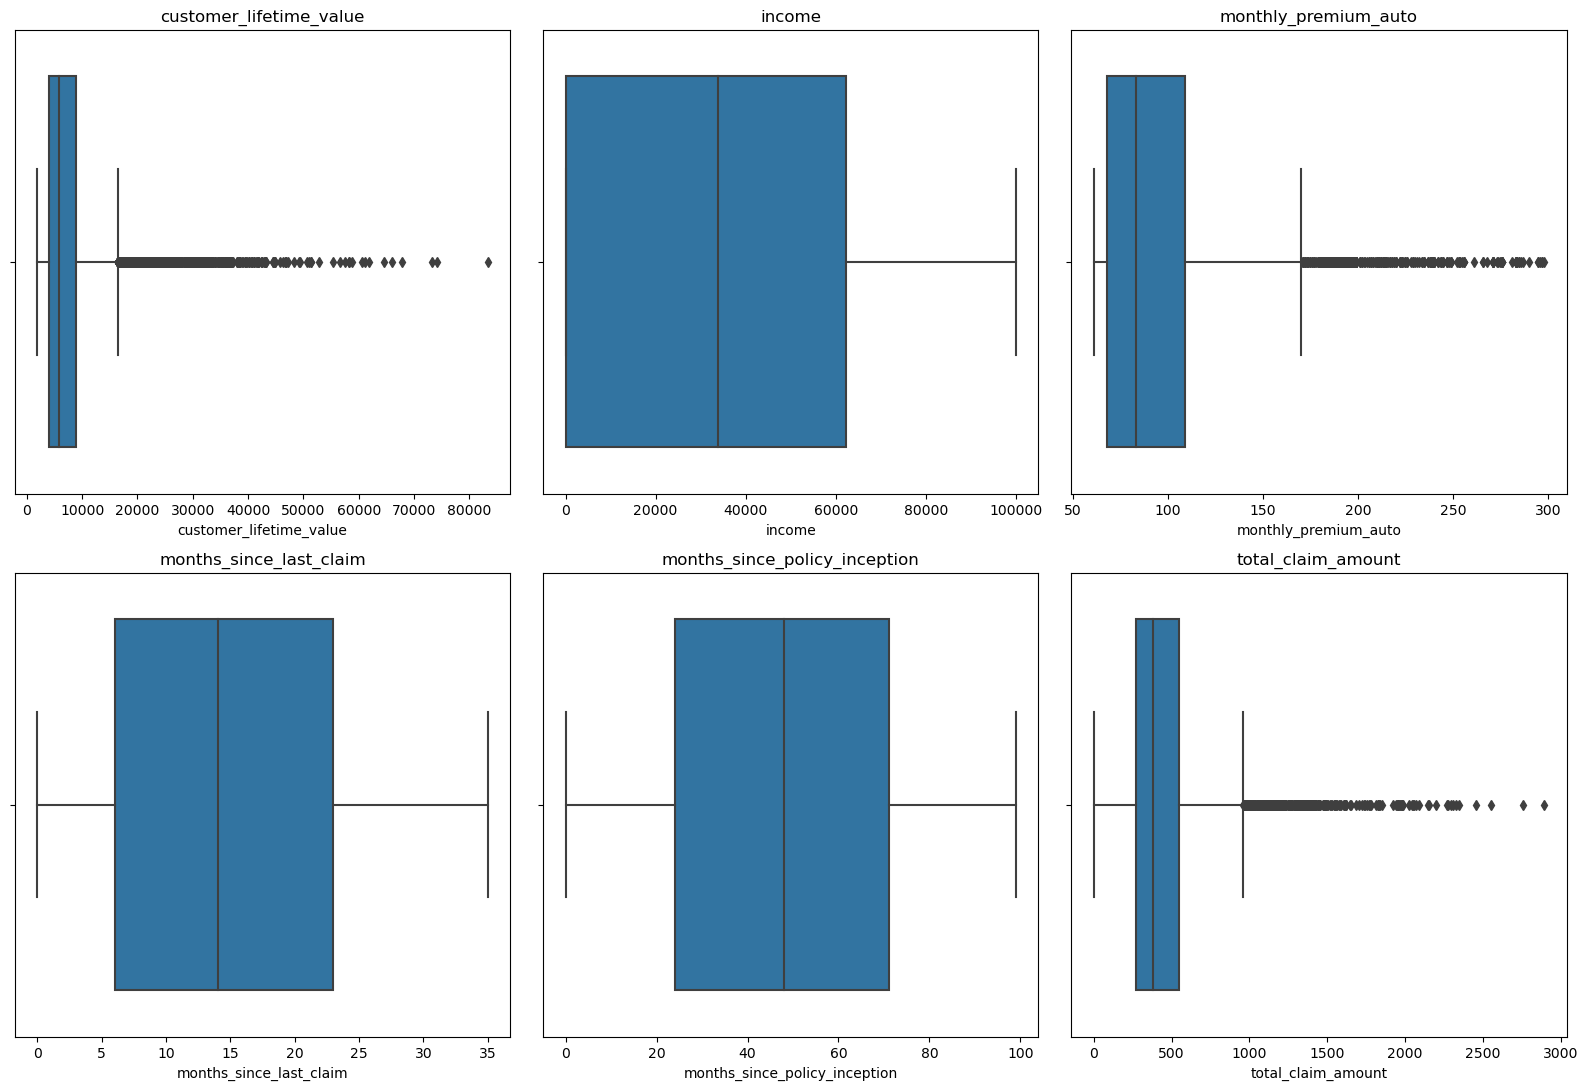

In [20]:
def outliers_continuous_data(continuous_data):
   
    plt.figure(figsize=(16, 16))
    for i, col in enumerate(continuous_data.columns):
        plt.subplot(len(continuous_data.columns)//3 + 1, 3, i+1)
        sns.boxplot(continuous_data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

outliers_continuous_data(continuous_data)